In [3]:
#import pixiedust
import pint
import matplotlib.pyplot as plt
import numpy as np
u = pint.UnitRegistry()

omega_0 = 3550 / u.second
n       = 2
r       = 0.1 * u.meter
delta   = 0.001 * u.meter
rho_f   = 10 * u.kg / u.meter**3
rho     = 1000 * u.kg / u.meter**3
p       = 1 * u.pascal
E       = 1 * 10**8 * u.pascal
sigma   = 0.3
m       = 1
L       = 0.3 * u.meter
a_CO2   = 3.647 * u.bar * ( u.meter ** 3 / u.kilomole)
b_CO2   = 0.0428 * u.meter**3 / u.kilomole
a_N2   = 1.366 * u.bar * ( u.meter ** 3 / u.kilomole)
b_N2   = 0.0386 * u.meter**3 / u.kilomole
temperature = 293.15 * u.kelvin
R_const = 8.3144598 * u.joule / u.mole / u.kelvin

def density(mass, volume):
    density = mass / volume
    return density

def P(mass,temperature,volume,mol_weight,a,b):
    first = mass/mol_weight*R_const*temperature 
    second = (volume-mass/mol_weight*b)
    third = a*mass**2/mol_weight**2/volume**2
    p=first/second-third
    return p

def omega(
    r,
    L,
    rho_f,
    thickness,
    p
    ):
    delta = thickness
    first = (1+r*rho_f/n/delta/rho)**(-1)
    second = 2*p/n**2/E*(r/delta)**3
    third = (1-sigma**2)/((m*np.pi*r/n/L)**2+1)
    omega = omega_0*(first*(1+second*third))**(0.5)
    return omega

def omega1(p):
    return omega(
    0.009 * u.meter,        # Radius of the middle surface
    0.3 * u.meter,          # Length of cylinder
    1 * u.kg / u.meter**3 , # fluid density
    0.01 * u.meter ,        # cylinder thickness
    p         )             # Internal pressure

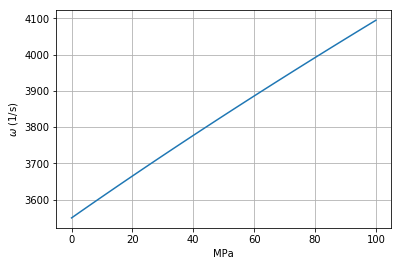

In [4]:
#%%pixie_debugger
pressure = np.linspace(0,100000000,101) * u.pascal
omega2 = omega1(pressure)
plt.xlabel("MPa")
plt.ylabel("$\omega$ (1/s)")
plt.grid()
plt.plot(pressure/1e6,omega2)
plt.show()

In [5]:
P(2*u.kilogram,temperature,1*u.meter**3,14 * u.gram / u.mole,a_N2,b_N2)

DimensionalityError: Cannot convert from 'joule * kilogram / gram / meter ** 3' ([mass] / [length] / [time] ** 2) to 'bar * kilogram ** 2 * mole ** 2 / gram ** 2 / kilomole / meter ** 3' ([mass] * [substance] / [length] ** 4 / [time] ** 2)